# Toronto Dwellings Analysis

In this assignment, you will perform fundamental analysis for the Toronto dwellings market to allow potential real estate investors to choose rental investment properties.

In [21]:
# imports
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import os
from pathlib import Path
from dotenv import load_dotenv

In [22]:
# Read the Mapbox API key
load_dotenv('/Users/Jordandass/mapbox.env')
map_box_api = os.getenv("mapbox")
px.set_mapbox_access_token(map_box_api)

## Load Data

In [23]:
# Read the census data into a Pandas DataFrame
file_path = Path("Data/toronto_neighbourhoods_census_data.csv")
to_data = pd.read_csv(file_path, index_col="year")
to_data.head()

,neighbourhood,single_detached_house,apartment_five_storeys_plus,movable_dwelling,semi_detached_house,row_house,duplex,apartment_five_storeys_less,other_house,average_house_value,shelter_costs_owned,shelter_costs_rented
year,,,,,,,,,,,,
2001,Agincourt North,3715,1480,0,1055,1295,195,185,5,200388,810,870
2001,Agincourt South-Malvern West,3250,1835,0,545,455,105,425,0,203047,806,892
2001,Alderwood,3175,315,0,470,50,185,370,0,259998,817,924
2001,Annex,1060,6090,5,1980,605,275,3710,165,453850,1027,1378
2001,Banbury-Don Mills,3615,4465,0,240,380,15,1360,0,371864,1007,1163


- - - 

## Dwelling Types Per Year

In this section, you will calculate the number of dwelling types per year. Visualize the results using bar charts and the Pandas plot function. 

**Hint:** Use the Pandas `groupby` function.

**Optional challenge:** Plot each bar chart in a different color.

In [24]:
# Calculate the sum number of dwelling types units per year (hint: use groupby)
to_data_drop = to_data.drop(columns=['average_house_value', 'shelter_costs_owned', 'shelter_costs_rented'])
to_data_group = to_data_drop.groupby(to_data_drop.index).sum()
to_data_group.head()

,single_detached_house,apartment_five_storeys_plus,movable_dwelling,semi_detached_house,row_house,duplex,apartment_five_storeys_less,other_house
year,,,,,,,,
2001,300930,355015,75,90995,52355,23785,116900,3040
2006,266860,379400,165,69430,54690,44095,162850,1335
2011,274940,429220,100,72480,60355,44750,163895,2165
2016,269680,493270,95,71200,61565,48585,165575,2845


In [25]:
# Save the dataframe as a csv file
to_data_group.to_csv('groupby_year.csv')

In [26]:
# Helper create_bar_chart function
def create_bar_chart(data, title, color, xlabel = '', ylabel = "Dwelling Type Units"):
    """
    Create a barplot based in the data argument.
    """
    title_graph = f"Dwelling Types in Toronto for {title}"
    
    xlabel = title
    
    ax = data.hvplot.bar(title = title_graph, xlabel = xlabel, ylabel = ylabel, color = color, rot = 90).opts(yformatter = "%.0f", height = 600)
    return ax
    

In [27]:
# Create a bar chart per year to show the number of dwelling types

# Bar chart for 2001
bar_2001 = create_bar_chart(to_data_group.loc[2001, :], title = '2001', color = 'red')

# Bar chart for 2006
bar_2006 = create_bar_chart(to_data_group.iloc[1, :], title = '2006', color = 'blue')

# Bar chart for 2011
bar_2011 = create_bar_chart(to_data_group.iloc[2, :], title = '2011', color = 'yellow')

# Bar chart for 2016
bar_2016 = create_bar_chart(to_data_group.iloc[3, :], title = '2016', color = 'purple')

pn.Column(bar_2001, bar_2006, bar_2011, bar_2016)

Column
    [0] HoloViews(Bars)
    [1] HoloViews(Bars)
    [2] HoloViews(Bars)
    [3] HoloViews(Bars)

- - - 

## Average Monthly Shelter Costs in Toronto Per Year

In this section, you will calculate the average monthly shelter costs for owned and rented dwellings and the average house value for each year. Plot the results as a line chart.

**Optional challenge:** Plot each line chart in a different color.

In [28]:
# Calculate the average monthly shelter costs for owned and rented dwellings
display(to_data)
to_data_shelter = to_data[['shelter_costs_owned', 'shelter_costs_rented']]
to_data_shelter_group = to_data_shelter.groupby(to_data_shelter.index).mean()
to_data_shelter_group.head()

,neighbourhood,single_detached_house,apartment_five_storeys_plus,movable_dwelling,semi_detached_house,row_house,duplex,apartment_five_storeys_less,other_house,average_house_value,shelter_costs_owned,shelter_costs_rented
year,,,,,,,,,,,,
2001,Agincourt North,3715,1480,0,1055,1295,195,185,5,200388,810,870
2001,Agincourt South-Malvern West,3250,1835,0,545,455,105,425,0,203047,806,892
2001,Alderwood,3175,315,0,470,50,185,370,0,259998,817,924
2001,Annex,1060,6090,5,1980,605,275,3710,165,453850,1027,1378
2001,Banbury-Don Mills,3615,4465,0,240,380,15,1360,0,371864,1007,1163
...,...,...,...,...,...,...,...,...,...,...,...,...
2016,Wychwood,920,1295,0,880,290,395,2080,35,787760,1864,1146
2016,Yonge-Eglinton,1400,1995,0,465,60,310,1445,0,1127052,2398,1535
2016,Yonge-St.Clair,520,4315,0,450,220,130,1370,0,1131888,2192,1619


,shelter_costs_owned,shelter_costs_rented
year,,
2001,846.878571,1085.935714
2006,1316.800000,925.414286
2011,1448.214286,1019.792857
2016,1761.314286,1256.321429


In [63]:
# Helper create_line_chart function
def create_line_chart(data, title, xlabel, ylabel, color):
    """
    Create a line chart based in the data argument.
    title = title, xlabel = xlabel, ylabel = ylabel, color = color
    """
    #title = f'Average Monthly Shelter Costs for {title} Dwellings in Toronto'
    
    return data.hvplot(title = title, xlabel = xlabel, ylabel = ylabel, color = color)

In [64]:
# Create two line charts, one to plot the monthly shelter costs for owned dwelleing and other for rented dwellings per year

# Line chart for owned dwellings
owned_dwellings_line = create_line_chart(to_data_shelter_group['shelter_costs_owned'], 'Owned', 'Year', 'Avg Monthly Shelter Costs', 'blue')
 

# Line chart for rented dwellings
rented_dwellings_line = create_line_chart(to_data_shelter_group.loc[:, 'shelter_costs_rented'], 'Rented', 'Year', 'Avg Monthly Shelter Costs', 'orange')

pn.Column(owned_dwellings_line, rented_dwellings_line)

Column
    [0] HoloViews(Curve)
    [1] HoloViews(Curve)

## Average House Value per Year

In this section, you want to determine the average house value per year. An investor may want to understand better the sales price of the rental property over time. For example, a customer will want to know if they should expect an increase or decrease in the property value over time so they can determine how long to hold the rental property. You will visualize the `average_house_value` per year as a bar chart.

In [67]:
# Calculate the average house value per year
to_data_house_value = to_data[['average_house_value']]
to_data_house_value_group = to_data_house_value.groupby(to_data_house_value.index).mean()
to_data_house_value_group

,average_house_value
year,
2001,289882.885714
2006,424059.664286
2011,530424.721429
2016,664068.328571


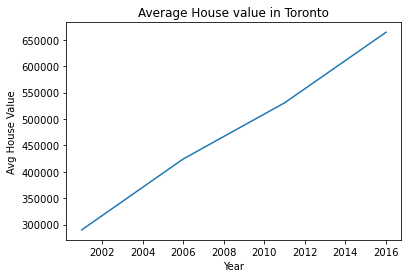

In [69]:
# Plot the average house value per year as a line chart
to_data_house_value_group.plot.line(title = 'Average House value in Toronto', xlabel = 'Year', ylabel = 'Avg House Value', legend = False);

- - - 

## Average House Value by Neighbourhood

In this section, you will use `hvplot` to create an interactive visualization of the average house value with a dropdown selector for the neighbourhood.

**Hint:** It will be easier to create a new DataFrame from grouping the data and calculating the mean house values for each year and neighbourhood.

In [71]:
# Create a new DataFrame with the mean house values by neighbourhood per year
to_data_house_value = to_data[['neighbourhood','average_house_value']]
to_data_nh = to_data_house_value.groupby([to_data_house_value.index, 'neighbourhood']).mean()
to_data_nh

average_house_value
year neighbourhood                                    
2001 Agincourt North                          200388.0
     Agincourt South-Malvern West             203047.0
     Alderwood                                259998.0
     Annex                                    453850.0
     Banbury-Don Mills                        371864.0
...                                                ...
2016 Wychwood                                 787760.0
     Yonge-Eglinton                          1127052.0
     Yonge-St.Clair                          1131888.0
     York University Heights                  425769.0
     Yorkdale-Glen Park                       599698.0

[560 rows x 1 columns]

In [76]:
# Use hvplot to create an interactive line chart of the average house value per neighbourhood
# The plot should have a dropdown selector for the neighbourhood

to_data_house_value.hvplot.line(xlabel = 'Year', ylabel = 'Avg. House Value', title = 'Neighbourhood', groupby = 'neighbourhood').opts(yformatter = '%.0f')

:DynamicMap   [neighbourhood]
   :Curve   [year]   (average_house_value)

## Number of Dwelling Types per Year

In this section, you will use `hvplot` to create an interactive visualization of the average number of dwelling types per year with a dropdown selector for the neighbourhood.

In [78]:
# Fetch the data of all dwelling types per year
to_data_drop = to_data.drop(columns=['average_house_value', 'shelter_costs_owned', 'shelter_costs_rented'])
to_data_drop

,neighbourhood,single_detached_house,apartment_five_storeys_plus,movable_dwelling,semi_detached_house,row_house,duplex,apartment_five_storeys_less,other_house
year,,,,,,,,,
2001,Agincourt North,3715,1480,0,1055,1295,195,185,5
2001,Agincourt South-Malvern West,3250,1835,0,545,455,105,425,0
2001,Alderwood,3175,315,0,470,50,185,370,0
2001,Annex,1060,6090,5,1980,605,275,3710,165
2001,Banbury-Don Mills,3615,4465,0,240,380,15,1360,0
...,...,...,...,...,...,...,...,...,...
2016,Wychwood,920,1295,0,880,290,395,2080,35
2016,Yonge-Eglinton,1400,1995,0,465,60,310,1445,0
2016,Yonge-St.Clair,520,4315,0,450,220,130,1370,0


In [85]:
# Use hvplot to create an interactive bar chart of the number of dwelling types per neighbourhood
# The plot should have a dropdown selector for the neighbourhood
to_data_drop.hvplot.bar(xlabel = 'Year', ylabel = 'Dwelling Type Units', title = 'Neighbourhood', groupby = 'neighbourhood', rot = 90, width = 700, height = 600)

:DynamicMap   [neighbourhood]
   :Bars   [year,Variable]   (value)

- - - 

## The Top 10 Most Expensive Neighbourhoods

In this section, you will need to calculate the house value for each neighbourhood and then sort the values to obtain the top 10 most expensive neighbourhoods on average. Plot the results as a bar chart.

In [87]:
# Getting the data from the top 10 expensive neighbourhoods
neighbourhood_group = to_data.groupby('neighbourhood').mean()
neighbourhood_10 = neighbourhood_group.nlargest(10, 'average_house_value')
neighbourhood_10

,single_detached_house,apartment_five_storeys_plus,movable_dwelling,semi_detached_house,row_house,duplex,apartment_five_storeys_less,other_house,average_house_value,shelter_costs_owned,shelter_costs_rented
neighbourhood,,,,,,,,,,,
Bridle Path-Sunnybrook-York Mills,2260.00,331.25,0.00,36.25,90.00,25.0,40.00,0.00,1526485.75,2360.75,2321.75
Forest Hill South,1742.50,2031.25,1.25,61.25,45.00,75.0,1027.50,3.75,1195992.50,1781.00,1313.75
Lawrence Park South,3472.50,773.75,0.00,126.25,38.75,225.0,966.25,16.25,1094027.75,1954.00,1372.75
Rosedale-Moore Park,2498.75,4641.25,0.00,486.25,245.00,327.5,1618.75,2.50,1093640.00,1909.75,1537.25
St.Andrew-Windfields,3225.00,1670.00,0.00,185.00,552.50,97.5,586.25,5.00,999107.00,1880.25,1384.50
Casa Loma,916.25,2310.00,0.00,288.75,201.25,162.5,1192.50,2.50,981064.25,1873.75,1547.75
Bedford Park-Nortown,4865.00,1981.25,0.00,43.75,57.50,287.5,1275.00,88.75,930415.25,1786.75,1255.00
Forest Hill North,1488.75,3392.50,0.00,12.50,16.25,82.5,402.50,1.25,851680.50,1722.75,1245.50
Kingsway South,2326.25,576.25,0.00,66.25,48.75,20.0,336.25,2.50,843234.25,1736.75,1622.00


In [91]:
# Plotting the data from the top 10 expensive neighbourhoods
neighbourhood_10.hvplot.bar(y = 'average_house_value', xlabel = 'Neighbourhood', ylabel = 'Avg. House Vale', rot = 90, width = 700, height = 600).opts(yformatter = '%.0f')

:Bars   [neighbourhood]   (average_house_value)

- - - 

## Neighbourhood Map

In this section, you will read in neighbourhoods location data and build an interactive map with the average house value per neighbourhood. Use a `scatter_mapbox` from Plotly express to create the visualization. Remember, you will need your Mapbox API key for this.

### Load Location Data

In [95]:
# Load neighbourhoods coordinates data
file_path = Path("Data/toronto_neighbourhoods_coordinates.csv")
df_neighbourhood_locations = pd.read_csv(file_path, index_col = 'neighbourhood')
df_neighbourhood_locations.head()

,lat,lon
neighbourhood,,
Agincourt North,43.805441,-79.266712
Agincourt South-Malvern West,43.788658,-79.265612
Alderwood,43.604937,-79.541611
Annex,43.671585,-79.404001
Banbury-Don Mills,43.737657,-79.349718


### Data Preparation

You will need to join the location data with the mean values per neighbourhood.

1. Calculate the mean values for each neighbourhood.

2. Join the average values with the neighbourhood locations.

In [94]:
# Calculate the mean values for each neighborhood
neighbourhood_group = to_data.groupby('neighbourhood').mean()
neighbourhood_group.head()

,single_detached_house,apartment_five_storeys_plus,movable_dwelling,semi_detached_house,row_house,duplex,apartment_five_storeys_less,other_house,average_house_value,shelter_costs_owned,shelter_costs_rented
neighbourhood,,,,,,,,,,,
Agincourt North,3435.00,1947.50,2.50,863.75,1406.25,512.50,547.50,10.00,329811.5,1109.00,983.50
Agincourt South-Malvern West,2897.50,2180.00,1.25,375.00,456.25,523.75,628.75,32.50,334189.0,1131.25,985.00
Alderwood,2903.75,302.50,1.25,503.75,76.25,302.50,502.50,1.25,427922.5,1166.75,1003.25
Annex,751.25,7235.00,1.25,1375.00,613.75,355.00,4605.00,83.75,746977.0,1692.75,1315.25
Banbury-Don Mills,3572.50,5388.75,1.25,273.75,626.25,32.50,1340.00,0.00,612039.0,1463.50,1242.75


In [96]:
# Join the average values with the neighbourhood locations
neighbourhood_value_location = pd.concat([df_neighbourhood_locations, neighbourhood_group], axis = 'columns', join = 'inner')
neighbourhood_value_location

,lat,lon,single_detached_house,apartment_five_storeys_plus,movable_dwelling,semi_detached_house,row_house,duplex,apartment_five_storeys_less,other_house,average_house_value,shelter_costs_owned,shelter_costs_rented
neighbourhood,,,,,,,,,,,,,
Agincourt North,43.805441,-79.266712,3435.00,1947.50,2.50,863.75,1406.25,512.50,547.50,10.00,329811.50,1109.00,983.50
Agincourt South-Malvern West,43.788658,-79.265612,2897.50,2180.00,1.25,375.00,456.25,523.75,628.75,32.50,334189.00,1131.25,985.00
Alderwood,43.604937,-79.541611,2903.75,302.50,1.25,503.75,76.25,302.50,502.50,1.25,427922.50,1166.75,1003.25
Annex,43.671585,-79.404001,751.25,7235.00,1.25,1375.00,613.75,355.00,4605.00,83.75,746977.00,1692.75,1315.25
Banbury-Don Mills,43.737657,-79.349718,3572.50,5388.75,1.25,273.75,626.25,32.50,1340.00,0.00,612039.00,1463.50,1242.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wychwood,43.676919,-79.425515,1056.25,1236.25,0.00,992.50,298.75,325.00,1878.75,17.50,565976.50,1390.75,1017.25
Yonge-Eglinton,43.704689,-79.403590,1468.75,1638.75,0.00,470.00,33.75,328.75,1385.00,6.25,809745.75,1799.50,1347.75
Yonge-St.Clair,43.687859,-79.397871,565.00,3948.75,0.00,425.00,212.50,172.50,1308.75,6.25,813220.25,1680.75,1369.00


### Mapbox Visualization

Plot the average values per neighbourhood using a Plotly express `scatter_mapbox` visualization.

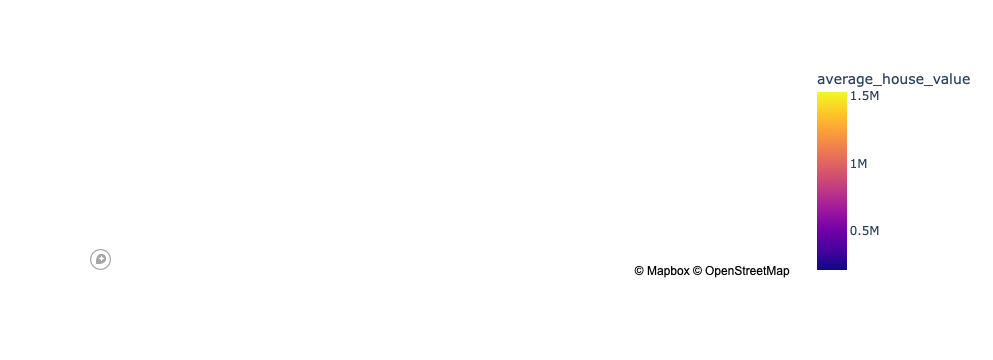

In [105]:
# Create a scatter mapbox to analyze neighbourhood info
px.scatter_mapbox(neighbourhood_value_location, lon='lon', lat='lat', color = 'average_house_value', size = 'average_house_value')

- - -

## Cost Analysis - Optional Challenge

In this section, you will use Plotly express to a couple of plots that investors can interactively filter and explore various factors related to the house value of the Toronto's neighbourhoods. 

### Create a bar chart row facet to plot the average house values for all Toronto's neighbourhoods per year

,neighbourhood,single_detached_house,apartment_five_storeys_plus,movable_dwelling,semi_detached_house,row_house,duplex,apartment_five_storeys_less,other_house,average_house_value,shelter_costs_owned,shelter_costs_rented
year,,,,,,,,,,,,
2001,Agincourt North,3715,1480,0,1055,1295,195,185,5,200388,810,870
2001,Agincourt South-Malvern West,3250,1835,0,545,455,105,425,0,203047,806,892
2001,Alderwood,3175,315,0,470,50,185,370,0,259998,817,924
2001,Annex,1060,6090,5,1980,605,275,3710,165,453850,1027,1378
2001,Banbury-Don Mills,3615,4465,0,240,380,15,1360,0,371864,1007,1163
...,...,...,...,...,...,...,...,...,...,...,...,...
2016,Wychwood,920,1295,0,880,290,395,2080,35,787760,1864,1146
2016,Yonge-Eglinton,1400,1995,0,465,60,310,1445,0,1127052,2398,1535
2016,Yonge-St.Clair,520,4315,0,450,220,130,1370,0,1131888,2192,1619


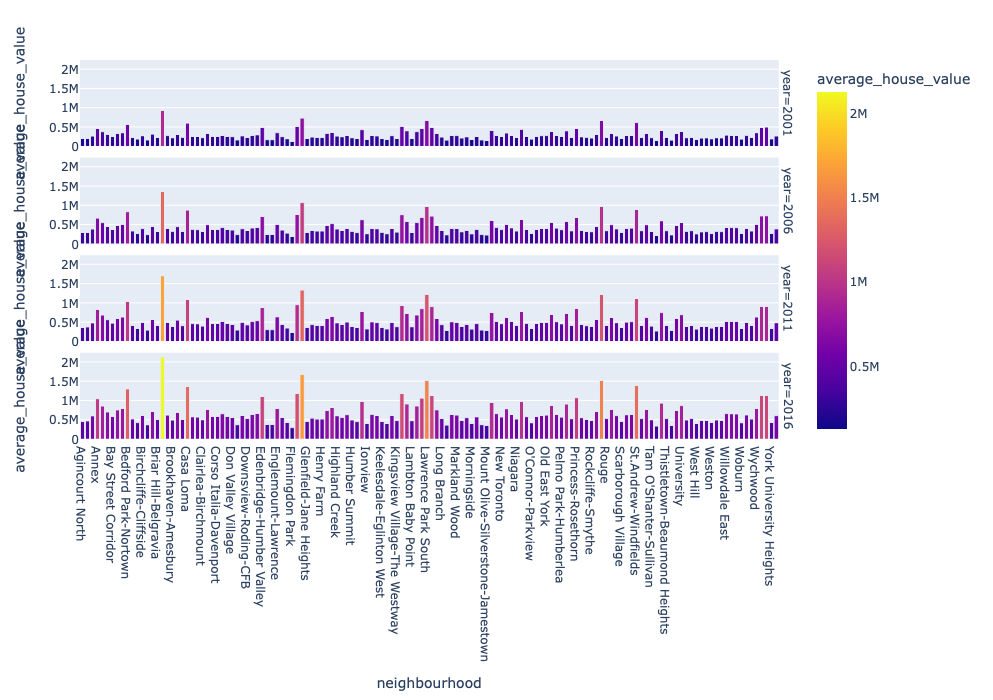

In [109]:
# YOUR CODE HERE!
display(to_data)
px.bar(to_data, x = 'neighbourhood', y = 'average_house_value', facet_row = to_data.index, color = 'average_house_value', height = 700)

### Create a sunburst chart to conduct a costs analysis of most expensive neighbourhoods in Toronto per year

In [125]:
# Empty list to store dataframe
df_list = []
# Fetch the data from all expensive neighbourhoods per year.
for year in list(set(to_data.index)):
    # Slicing a specific year
    year_df = to_data.loc[year, :]
    # Sorting yearly data by top 10 highest neighbourhoods by shelter_costs_owned
    year_10_df = year_df.nlargest(10, 'shelter_costs_owned')
    # Storing dataframe in a list to be concatenated
    df_list.append(year_10_df)
    
expensive_neighbourhoods = pd.concat(df_list, axis = 'rows', join = 'inner')
expensive_neighbourhoods

,neighbourhood,single_detached_house,apartment_five_storeys_plus,movable_dwelling,semi_detached_house,row_house,duplex,apartment_five_storeys_less,other_house,average_house_value,shelter_costs_owned,shelter_costs_rented
year,,,,,,,,,,,,
2016,Bridle Path-Sunnybrook-York Mills,2275,590,0,40,230,30,80,0,2124653,2903,2942
2016,Lawrence Park South,3420,925,0,110,35,230,1015,5,1522732,2644,1515
2016,St.Andrew-Windfields,3245,1745,0,175,540,120,595,5,1390616,2516,1565
2016,Rosedale-Moore Park,2450,4990,0,485,260,345,1505,5,1522193,2498,1809
2016,Casa Loma,875,2680,0,265,200,155,1225,0,1365503,2434,1841
2016,Bedford Park-Nortown,4820,1995,0,45,65,315,1260,115,1295007,2418,1385
2016,Yonge-Eglinton,1400,1995,0,465,60,310,1445,0,1127052,2398,1535
2016,Forest Hill South,1685,2025,0,65,40,70,1050,0,1664653,2383,1486
2016,Lawrence Park North,3110,205,0,885,30,185,1005,0,1056967,2338,1589


In [25]:
# Create the sunburst chart
px.sunburst(to_data, names = 'neighbourhood', parent = to_data.index, values = 'average_house_value')

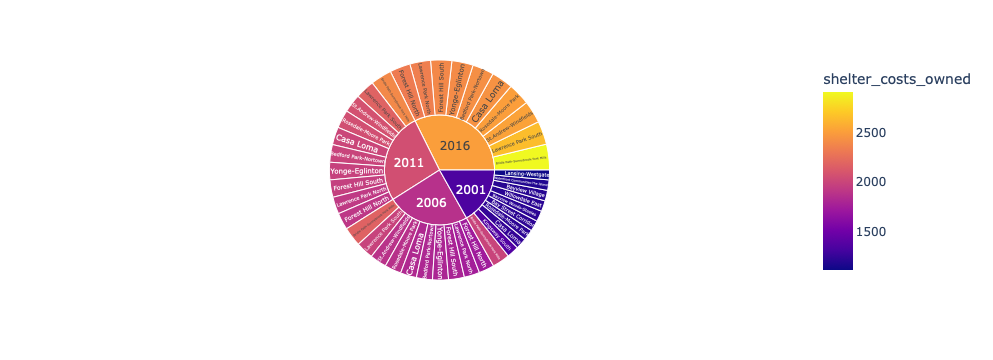

In [131]:
px.sunburst(expensive_neighbourhoods, path = [expensive_neighbourhoods.index, 'neighbourhood'], values = 'shelter_costs_owned', color = 'shelter_costs_owned')